In [120]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, END
import random

In [121]:
class AgentState(TypedDict):
    player_name: str
    guesses: List[int]
    attempts: int
    guessed_num: int
    lower_bound: int
    answer: int
    upper_bound: int

In [122]:
def greeting(state: AgentState) -> AgentState:
    print("Dear " + state['player_name'] + " hello at this wonderful game!")
    state['guessed_num'] = random.randint(state["lower_bound"], state["upper_bound"])
    return state 

def guess_number(state: AgentState) -> AgentState:
    state["answer"] = int(input("\nyour guess: "))
    state['guesses'].append(state["answer"])
    state["attempts"] += 1 
       
    return state

def should_continue(state: AgentState) -> AgentState:
    if state["answer"] == state["guessed_num"]:
        print("You're right!\n")
        return "exit"
    else:
        print(f"\nI'm sorry it's incorrect\nyour assumptions: {str(state['guesses'])}" + f"\nYour attempts: {state["attempts"]}")
        print("Correct answer is lower!\n") if state["answer"] > state["guessed_num"] else print("Correct answer is higher!\n")  
        return "loop"

In [123]:
graph = StateGraph(AgentState)
graph.add_node('greeting', greeting)
graph.add_node('guess', guess_number)
graph.add_edge('greeting', 'guess')

graph.add_conditional_edges('guess', should_continue, {
    "loop": "guess",
    "exit": END
})
graph.set_entry_point('greeting')
app = graph.compile()

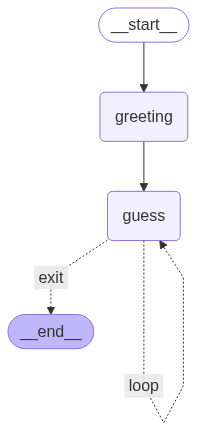

In [124]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [125]:
state = AgentState(player_name="Yermak", attempts=0, guesses=[], lower_bound=0, upper_bound=20)
res = app.invoke(state)

Dear Yermak hello at this wonderful game!

I'm sorry it's incorrect
your assumptions: [1]
Your attempts: 1
Correct answer is higher!


I'm sorry it's incorrect
your assumptions: [1, 10]
Your attempts: 2
Correct answer is lower!


I'm sorry it's incorrect
your assumptions: [1, 10, 5]
Your attempts: 3
Correct answer is higher!


I'm sorry it's incorrect
your assumptions: [1, 10, 5, 7]
Your attempts: 4
Correct answer is lower!


I'm sorry it's incorrect
your assumptions: [1, 10, 5, 7, 9]
Your attempts: 5
Correct answer is lower!


I'm sorry it's incorrect
your assumptions: [1, 10, 5, 7, 9, 8]
Your attempts: 6
Correct answer is lower!

You're right!

